# Algorithmic Complexity
<br>Just one method of Psi-Py you can get complex algorithm, but it's not enough. So, go through the basic principles.
Profiling (e.g. with `timeit`) doesn’t tell us much about how an algorithm will perform on a different computer since it is determined by the hardware features. To compare performance in a device-indpendent fashion, a formalism (a.k.a the "Big-O") is used that characterizes functions in terms of their rates of growth as a function of the size *n* of the input. 
<br>To classify an algorithm access the scaling of the performances wrt the input, since the scaling doesn't depend on hardware unless that you // the things. Larger input larger time. 
An algorithm is compared to a given function of the input $g(n)$ with a well defined scaling with *n*, e.g. $n^2$; if the ratio of the two is bounded, than that algorithm is ${\cal O}(g(n))$. Note that:
* Only the largest terms in the scaling of $g(n)$ is kept in the notation
* two algorithms can have the same complexity and have very different performance; the same complexity only implies that the difference in performance is independent of *n*.

### Comparing bubble sort ${\cal O}(n^2)$ and merge sort ${\cal O}(n\log{n})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


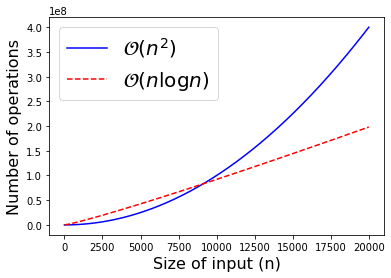

In [9]:
def f1(n, k):
    return k*n*n

def f2(n, k):
    return k*n*np.log(n)

n = np.arange(0.1, 20001)
plt.plot(n, f1(n, 1), c='blue')
plt.plot(n, f2(n, 1000), c='red', linestyle="--")
plt.xlabel('Size of input (n)', fontsize=16)
plt.ylabel('Number of operations', fontsize=16)
plt.legend(['$\mathcal{O}(n^2)$', '$\mathcal{O}(n \log n)$'], loc='best', fontsize=20);

Even 2 alg, migth scale linearly (~n) but the coefficient in front of it is important (ex. 3*n != 100000*n has != scaling-> complexity is defined as the order of scaling. So, different beh even appartenendo alla stessa classe di complexity)

See [here](https://wiki.python.org/moin/TimeComplexity) for the complexity of operations on standard Python data structures. Note for instance that searching a list is much more expensive than searching a dictionary.

## Space Complexity

There're memory issues -> space complexity. In general, be smart to represent the data in memory: ex. use int if the # are int not float.
View is less demanding than copy. If all the mem is occupy, there's the "swapping" since cpu is accessing the disk (mem is fully occupied).
We can also use ${\cal O}$ notation in the same way to measure the space complexity of an algorithm.  The notion of space complexity becomes important when your data volume is of the same magnitude or larger than the memory you have available. In that case, an algorithm with high space complexity may end up having to swap memory constantly, and will perform far worse than its time complexity would suggest.

Just as you should have a good idea of how your algorithm will scale with increasing *n*, you should also be able to know how much memory your data structures will require. For example, if you had an $n\times p$ matrix of integers, an $n\times p$ matrix of floats, and an $n\times p$ matrix of complex floats, how large can $n$ and $p$ be before you run out of RAM to store them?

In [10]:
# Notice how much overhead Python objects have
# A raw integer should be 64 bits or 8 bytes only

import sys
print (sys.getsizeof(1))
print (sys.getsizeof(1234567890123456789012345678901234567890))
print (sys.getsizeof(3.14))
print (sys.getsizeof(3j))
print (sys.getsizeof('a'))
print (sys.getsizeof('hello world'))

28
44
24
32
50
60


### Varying the type the storage is different

In [11]:
print (np.ones((100,100), dtype='byte').nbytes)
print (np.ones((100,100), dtype='i2').nbytes)
print (np.ones((100,100), dtype='int').nbytes) # default is 64 bits or 8 bytes
print (np.ones((100,100), dtype='f4').nbytes)
print (np.ones((100,100), dtype='float').nbytes) # default is 64 bits or 8 bytes
print (np.ones((100,100), dtype='complex').nbytes)

10000
20000
80000
40000
80000
160000


# Scipy: high-level scientific computing

The `scipy` package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

`scipy` can be compared to other standard scientific-computing libraries, such as the GSL (GNU Scientific Library for C and C++), or Matlab’s toolboxes. `scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and `scipy` work hand in hand.

Before implementing a routine, it is worth checking if the desired data processing is not already implemented in `scipy`. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, `scipy`’s routines are optimized and tested, and should therefore be used when possible.

# Linear algebra with scipy and numpy

The `scipy.linalg` module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).

We will review a few examples and applications. Sometimes numpy implements those methods too: if a given algorithm is present both in numpy and scipy, typically the latter is more performant.

In [3]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

# to limit the printout
%precision 4
np.set_printoptions(suppress=True)


In [13]:
# norm of a vector that is rep as numpy.array
v = np.array([1,2])
print (la.norm(v))

# distance between two vectors
w = np.array([1,1])
print (la.norm(v-w))

# inner products 
print (v.dot(w))



2.23606797749979
1.0
3


### Elaborate example: covariance matrix as outer product

The inner product is just matrix multiplication of a 1×n vector with an n×1 vector.
The outer product of two vectors is instead just the opposite. It is given by:

$$
v\otimes w=vw^t
$$

Note that $v$ and $w$ are column vectors. The result of the inner product is a scalar. The result of the outer product is a matrix.
 [here](https://numpy.org/doc/stable/reference/generated/numpy.outer.html)

In [14]:
print (np.outer(v,w))

[[1 1]
 [2 2]]


In [15]:
# generate 4 sequences of 10 random numbers (flat between 0 and 1)
n, p = 10, 4
v = np.random.random((p,n))
v

array([[0.719 , 0.1997, 0.5674, 0.6463, 0.406 , 0.9673, 0.8556, 0.3491,
        0.2521, 0.8098],
       [0.3395, 0.9024, 0.9772, 0.1268, 0.9972, 0.5156, 0.5405, 0.4209,
        0.8048, 0.9297],
       [0.5727, 0.4865, 0.0125, 0.3891, 0.6992, 0.9789, 0.9594, 0.4481,
        0.9452, 0.737 ],
       [0.939 , 0.6836, 0.9732, 0.7535, 0.2841, 0.2416, 0.5433, 0.1238,
        0.6049, 0.7474]])

In [16]:
np.cov(v)

array([[ 0.0709, -0.0282,  0.0239,  0.007 ],
       [-0.0282,  0.094 , -0.0036,  0.006 ],
       [ 0.0239, -0.0036,  0.0935, -0.0401],
       [ 0.007 ,  0.006 , -0.0401,  0.0848]])

[Whats a Covariant Matrix?](https://en.wikipedia.org/wiki/Covariance_matrix)

In [49]:
#cov matrix by hand
# compute the mean of each sequence and set the right shape
v_mean= v.mean(axis=1)[:, np.newaxis] #4x1 vector
print (v_mean)

# re-center each sequence around its mean (mean=0)
w = v - v_mean
print (w)

# compute the covariance matrix
cov=w.dot(w.T)/(n - 1)
print (cov)

[[0.5772]
 [0.6555]
 [0.6229]
 [0.5894]]
[[ 0.1418 -0.3775 -0.0098  0.0691 -0.1712  0.39    0.2784 -0.2281 -0.3252
   0.2326]
 [-0.316   0.2469  0.3218 -0.5286  0.3417 -0.1398 -0.115  -0.2346  0.1493
   0.2742]
 [-0.0501 -0.1364 -0.6104 -0.2337  0.0763  0.356   0.3366 -0.1748  0.3223
   0.1141]
 [ 0.3496  0.0941  0.3838  0.164  -0.3053 -0.3478 -0.0461 -0.4657  0.0154
   0.158 ]]
[[ 0.2128 -0.0847  0.0718  0.0211]
 [-0.0847  0.282  -0.0109  0.018 ]
 [ 0.0718 -0.0109  0.2805 -0.1204]
 [ 0.0211  0.018  -0.1204  0.2545]]


### Traces and determinants

In [15]:
n = 6
np.random.seed(12345)
M = np.random.randint(100,size=(n,n))
print(M,'\n')
print ('determinant:',la.det(M),'\n')
print ('trace:',M.trace(),'\n')

[[98 29  1 36 41 34]
 [29  1 59 14 91 80]
 [73 11 77 10 81 82]
 [38  7 43 23 29 56]
 [55 31 61 97 91 87]
 [36 64  3  5 15 75]] 

determinant: -33370127003.99997 

trace: 365 



## Matrix Decomposition

Often data analysis problems boil down to solving linear systems. An example is the [Netflix Competition](https://en.wikipedia.org/wiki/Netflix_Prize), where a matrix of $400000\times18000$ (ratings times movies) needed to be dealt with: the competition was to correlate the quantities inside of it and especially invert that matrix: scipy.invert doesn't work.

Matrix decompositions are an important step in solving linear systems in a computationally efficient manner.

### Lower-Upper factorization

Let A be a square matrix. An LU factorization refers to the factorization of A, with proper row and/or column orderings or permutations, into two factors – a lower triangular matrix L and an upper triangular matrix U:

$A=LU$

when solving a system of linear equations, $Ax=b=LUx$, the solution is done in two logical steps:
1. solve $Ly=b$ for $y$.
2. solve $Ux=y$ for $x$.

Often a permutation $P$ is needed (*partial pivoting*) to best reorder the rows of the original matrix

In [19]:
A = np.array([[1,3,4],[2,1,3],[4,1,2]])
print(A,'\n')

P, L, U = la.lu(A) #to decomposed in this way the matrix
print(np.dot(P.T, A),'\n')
print(np.dot(L, U),'\n')
print(P,'\n')
print(L,'\n')
print(U,'\n')
#So, L*U=A as said before

[[1 3 4]
 [2 1 3]
 [4 1 2]] 

[[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 

[[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

[[1.     0.     0.    ]
 [0.25   1.     0.    ]
 [0.5    0.1818 1.    ]] 

[[4.     1.     2.    ]
 [0.     2.75   3.5   ]
 [0.     0.     1.3636]] 



### Eigendecomposition

Given an $n\times n$ matrix $A$, with $\det{A}\ne0$, then there exist n  linearly independent eigenvectors and $A$ may be decomposed in the following manner:

$$ 
A=V\Lambda V^{-1}
$$

where $\Lambda$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$ and the columns of $V$ are the corresponding eigenvectors of $A$.

Eigenvalues are roots of the *characteristic polynomial* of $A$:

$$
\det{A-\lambda I}=0
$$


In [20]:
A = np.array([[0,1,1],[2,1,0],[3,4,5]])
print (A)

l, V = la.eig(A)
print (V)
print (l) #3 scalar values = evls of complex number 
print(np.real_if_close(l)) #if matrix is pos def, real evls

[[0 1 1]
 [2 1 0]
 [3 4 5]]
[[ 0.1802  0.6721  0.    ]
 [ 0.0743 -0.7249 -0.7071]
 [ 0.9808  0.1509  0.7071]]
[ 5.8541+0.j -0.8541+0.j  1.    +0.j]
[ 5.8541 -0.8541  1.    ]


In [21]:
print(np.dot(V,np.dot(np.diag(np.real_if_close(l)), la.inv(V))),'\n')

[[-0.  1.  1.]
 [ 2.  1.  0.]
 [ 3.  4.  5.]] 



### Singular Value Decomposition

Tipically, rows (measurments) are != columns (features)-> SVDec <br>
Another important matrix decomposition is singular value decomposition or SVD. For any $m\times n$ matrix $A$, we may write:

$$A=UDV^T$$

where $U$ is a orthogonal $m\times m$ matrix, $D$ (spectrum) is a rectangular, diagonal $m\times n$ matrix with diagonal entries $d_1,\dots,d_m$ all non-negative, $V$ is an orthogonal $n\times n$ matrix.

The singular-value decomposition is a generalization of the eigendecomposition in the sense that it can be applied to any $m \times n$ matrix whereas eigenvalue decomposition can only be applied to diagonalizable matrices. 

Given an SVD of $A$, as described above, the following holds:
$U^T=U^{-1}$

$$
A^T A = VD^TU^T UDV^T = VD^TDV^T 
$$
$$
A A^T = UD^TV^T VDU^T = UD^TDU^T
$$

2nd line is the eigen dec of $AA^T$ <br>
The right-hand sides of these relations describe the eigenvalue decompositions of the left-hand sides. Consequently:
* The columns of V (right-singular vectors) are eigenvectors of $A^TA$.
* The columns of U (left-singular vectors) are eigenvectors of $AA^T$.
* The non-zero elements of D (non-zero singular values) are the square roots of the non-zero eigenvalues of $A^TA$ or $AA^T$.

A geometrical representation of SVD is given by the following figure:

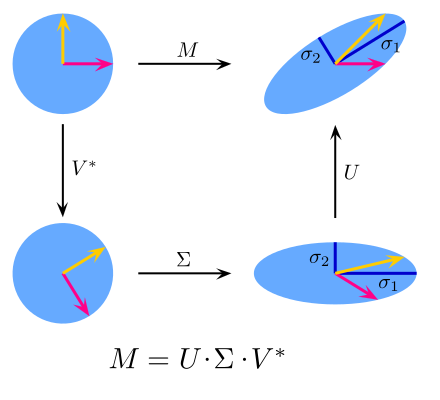

In [22]:
from IPython.display import Image
"""M=A; EDec:= V*(1st rotation)*Sigma(modify length)*U(rotation); """
Image("Singular-Value-Decomposition.png")

In [42]:
m, n = 5, 4
A = np.random.randn(m, n) + 1.j*np.random.randn(m, n)
print (A,'\n')

U, spectrum, Vt = la.svd(A)

print("shapes:", U.shape,  spectrum.shape, Vt.shape)
print (spectrum,'\n')
print (U,'\n')
print (Vt,'\n')

[[-0.3092-1.6574j -1.3052+0.4048j  1.2382+0.8866j -0.0853+0.6752j]
 [-0.5372-0.3479j -0.26  -0.3512j -0.6551-1.5091j -1.0561+1.3043j]
 [ 1.0024+0.9503j  0.6412-1.5104j  0.0942+0.8478j  0.9891-0.3809j]
 [ 2.0969-0.688j  -0.693 +0.0767j  0.1383+2.3495j  0.0405+0.7301j]
 [-1.7547-2.4942j  0.3258+0.8393j  0.7943-2.1478j  0.4611-0.4501j]] 

shapes: (5, 5) (4,) (4, 4)
[5.9035 2.8363 1.6727 1.2543] 

[[ 0.1193-0.3713j  0.2752+0.2902j -0.4247+0.0711j -0.4715+0.155j
   0.095 +0.4972j]
 [-0.2054+0.0219j -0.1457+0.6534j  0.5166-0.0456j -0.358 +0.2202j
   0.1244-0.2192j]
 [ 0.2356+0.1842j -0.1209-0.5114j  0.2132-0.4496j -0.4696+0.2161j
   0.3251+0.1179j]
 [ 0.5366-0.0828j  0.2856+0.1786j  0.0184+0.016j   0.0915-0.3825j
   0.5656-0.3414j]
 [-0.4696-0.4478j -0.0452+0.0143j  0.0722-0.5406j  0.2419-0.3106j
   0.2861+0.2056j]] 

[[ 0.714 +0.j     -0.2193-0.1858j  0.096 +0.6282j  0.0159+0.0585j]
 [-0.2829+0.j      0.0263+0.4671j -0.1217+0.4268j  0.4825+0.5209j]
 [ 0.4708+0.j      0.5015-0.0339j  0.0988-

In [46]:
# Let's verify the definition of SVD by hand
D = np.zeros((m, n))
for i in range(min(m, n)):
    D[i, i] = spectrum[i]
SVD = np.dot(U, np.dot(D, Vt)) #U*D*Vt ?= A
print(SVD)
print("\nThese evls are equal, right?", np.allclose(SVD, A) )

[[-0.3092-1.6574j -1.3052+0.4048j  1.2382+0.8866j -0.0853+0.6752j]
 [-0.5372-0.3479j -0.26  -0.3512j -0.6551-1.5091j -1.0561+1.3043j]
 [ 1.0024+0.9503j  0.6412-1.5104j  0.0942+0.8478j  0.9891-0.3809j]
 [ 2.0969-0.688j  -0.693 +0.0767j  0.1383+2.3495j  0.0405+0.7301j]
 [-1.7547-2.4942j  0.3258+0.8393j  0.7943-2.1478j  0.4611-0.4501j]]

These evls are equal, right? True


We've seen 3 Methods: Lower Upper Dec, Eigen Decomposition, Singular Values Decomposition

Clearly scipy provide already a "solve" method for the linear systems of the type:

$$A x = b $$

still, knowing a little bit what are the algorithms underneath comes handy sometimes, e.g. the solve method can be instructed about what kind of matrix $A$ is likely to be (symmetric, hermitian, positive definite, etc.) <br>
If A is really big isn't possible to use solve

In [25]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = la.solve(A, b)
print (x)

[ 2. -2.  9.]


In [26]:
np.dot(A, x) == b


array([ True,  True,  True])

# Principal Component Analysis 

Complexity of the problem is scaling as an exponential of n.
Getting rid f the non-useful variables.
Change the basis in the problem we're considering -> small subset of variables are relevants. So, analyze the basis where the problem is simple, rotating or lin comb of "feature" ("autoencoder" takes NL-combination of feats). 
<br>Principal Components Analysis (PCA) aims at finding and ranking all the eigenvalues and eigenvectors of a given dataset's covariance matrix. This is useful because high-dimensional data (with $p$ features) may have nearly all their variation in a small number of dimensions $k$, i.e. in the subspace spanned by the eigenvectors of the covariance matrix that have the $k$ largest eigenvalues. If we project the original data into this subspace, we can have a dimension reduction (from $p$ to $k$) with hopefully little loss of information.
In fact, it's very difficult that a problem has the need of all the variables ("Occham's razor"). So, exclude variables without a variance. 
Numerically, PCA can be done either by means of eigendecomposition on the covariance matrix or via SVD on the data matrix. Even though the latter is usually preferred, let's have a look first at the former.
<br>Ex., if add a column with small measurments -> drop it, since it's not so meaninfull. Retains the component that varies the most.
To do this, EDec of Cov Matrix.


To start with let's recall the definition of the covariance matrix (of 2 variables):

$$
{\rm Cov}(X,Y)=\frac{\sum_{i=1}^n (X_i-\bar{X})(Y_i-\bar{Y})}{n-1}
$$

with Cov$(X,X)$ the variance of the variable $X$.

In [25]:
np.random.seed(12345)
# construct a dataset with a skewed 2D distribution
mu = [0,0] # <== zero mean! useful for later
sigma = [[0.6,0.2],
         [0.2,0.2]] # asymmetric sigmas
n = 1000
X = np.random.multivariate_normal(mu, sigma, n).T
#sigmas are not the same so "cued" distribution
print(X)
#plt.scatter(X[0,:], X[1,:], alpha=0.2)

[[ 0.0935  0.4694 -1.6833 ... -0.7935  0.2557  2.0825]
 [ 0.2162 -0.0115 -0.181  ... -0.8257  0.0161  1.5734]]


In [28]:
# the covariance matrix
np.cov(X)

array([[0.6093, 0.1915],
       [0.1915, 0.1875]])

In [29]:
# now find the eigenvectors of the covariance matrix.. (AAA)
#l, V = np.linalg.eig(np.cov(X))
l, V = la.eig(np.cov(X))

print (l)
print (V)

# First recall that V is an orthogonal matrix (and thus its transpose is also its inverse)
V.dot(V.T)

[0.6833+0.j 0.1136+0.j]
[[ 0.9328 -0.3603]
 [ 0.3603  0.9328]]


array([[1., 0.],
       [0., 1.]])

(0.683314747210292+0j) [0.9328 0.3603]
(0.11356189747556152+0j) [-0.3603  0.9328]


/home/hal20/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


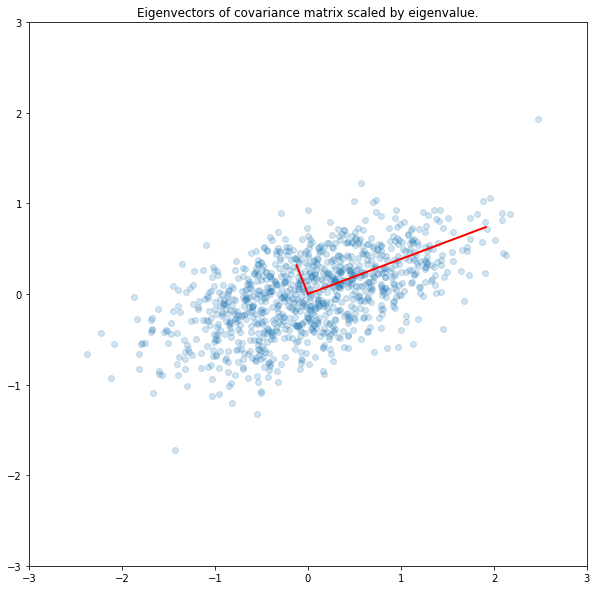

In [30]:
plt.figure(figsize=(10,10))
# the original data distribution
plt.scatter(X[0,:], X[1,:], alpha=0.2)

# a scale factor to emphazise the lines 
scale_factor=3

#scale factor for the eigenvalues

# draw each eigenvector
for li, vi in zip(l, V.T):
    print (li, vi)
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-3,3,-3,3])
plt.title('Eigenvectors of covariance matrix scaled by eigenvalue.');


In the case the features of the datasets have all zero mean, the covariance matrix is of the form:

$$
{\rm Cov}(X)=\frac{XX^T}{n-1}
$$

and thus

[0.6838 0.1136]
[[ 0.9329 -0.3601]
 [ 0.3601  0.9329]]


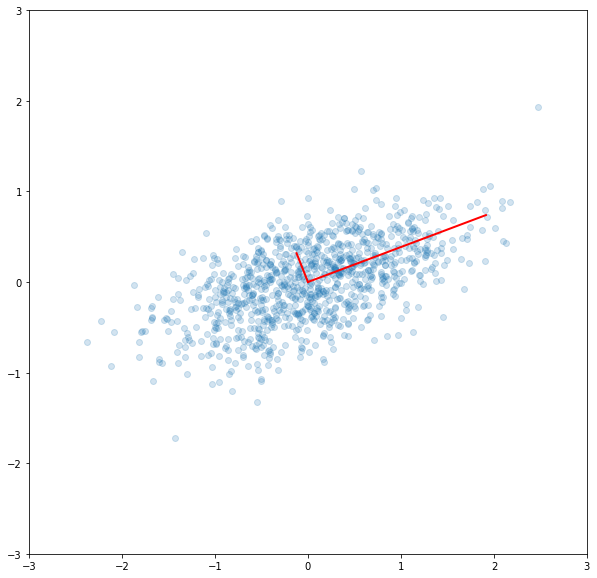

In [31]:
#obtain the same results as in (AAA)| mean = 0,0
l0, V0 = np.linalg.eig(np.dot(X, X.T)/(n-1))
print (l0)
print (V0)

plt.figure(figsize=(10,10))
plt.scatter(X[0,:], X[1,:], alpha=0.2)
for li, vi in zip(l0, V0.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);


We can now use the eigenvectors and eigenvalues to rotate the data, i.e. take the eigenvectors as new basis vectors and redefine the data points w.r.t this new basis.

In [32]:
# rotate all the data points accordingly to the new base
Xp = np.dot(V0.T, X)

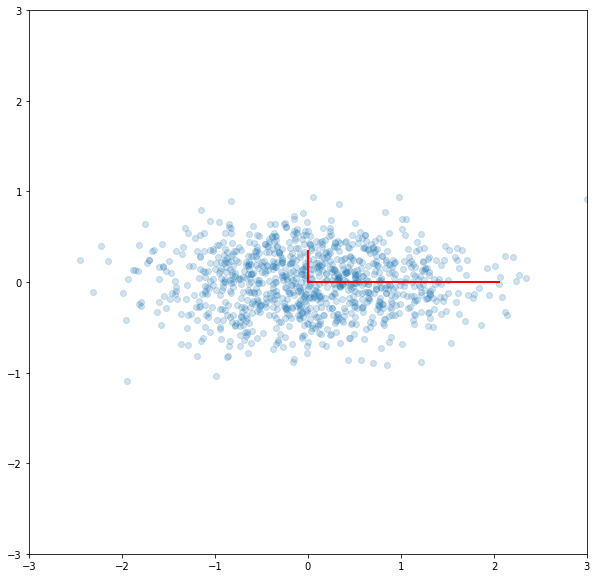

In [33]:
# then plot the rotated dataset and its "axes"
plt.figure(figsize=(10,10))
plt.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l0, np.diag([1]*2)): #only have the diag term in cov
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

Retain only the principal component

For example, if we only use the first column of $xp$, we will have the projection of the data onto the first principal component, capturing the majority of the variance in the data with a single featrue that is a linear combination of the original features.

We may need to transform the (reduced) data set to the original feature coordinates for interpreation. This is simply another linear transform (matrix multiplication).

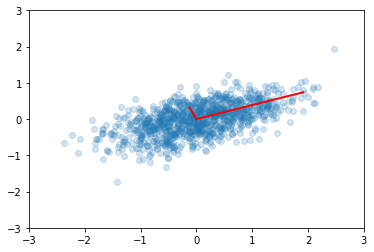

In [34]:
Xpp = np.dot(V0, Xp)
plt.scatter(Xpp[0,:], Xpp[1,:], alpha=0.2)
for li, vi in zip(l0, V0.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

## Dimension reduction via PCA


Given the spectral decomposition:

$$ 
A=V\Lambda V^{-1}
$$

with $\Lambda$ of rank $p$. Reducing the dimensionality to $k<p$ simply means setting to zero all but the first $k$ diagonal values (ordered from the largest to the smaller in module; that is the default in numpy/scipy).

In this way we catch the most relevant part of its variability (covariance).

In [35]:
l, V = np.linalg.eig(np.cov(X))
Lambda=np.diag(l)
print (Lambda)
print ("A.trace():", np.cov(X).trace())
print ("Lambda.trace():", Lambda.trace())

print (Lambda[0,0]/Lambda.trace())

[[0.6833 0.    ]
 [0.     0.1136]]
A.trace(): 0.7968766446858536
Lambda.trace(): 0.7968766446858535
0.8574912463141265


If i drop the second coordinate, i'll describe the 86% of my dataset.
Ex., if 10 columns, go to 2 columns is better!
Since the trace is invariant under change of basis, the total variability is also unchaged by PCA. By keeping only the first $k$ principal components, we can still “explain” 
$\sum_1^k \lambda_i/\sum_1^p \lambda_i$ of the total variability. Sometimes, the degree of dimension reduction is specified as keeping enough principal components so that (say) 90% fo the total variability is exlained.

## SVD for PCA

If mean value=0, SVD in datamatrix = PCA on CovMatrix
We saw that SVD is a decomposition of the data matrix $X=UDV^T$ where U and V are orthogonal matrices and D is a diagnonal matrix.


Compare with the eigendecomposition of a matrix $A=W\Lambda W^{−1}$, we see that SVD gives us the eigendecomposition of the matrix $XX^T$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $U$ and eigenvalues by $D^2$ (scaled by n−1).

[[-0.2958 -0.8598 -1.4881 ... -0.1501 -0.1341 -0.6896]
 [ 0.1565 -0.2478 -0.6872 ... -0.019   0.0261  0.275 ]]
[[ 0.2121  0.8887  1.6382 ...  0.1458  0.1136  0.5292]
 [ 0.2589  0.1045 -0.0573 ...  0.0406  0.076   0.5206]]


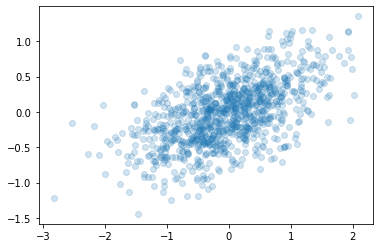

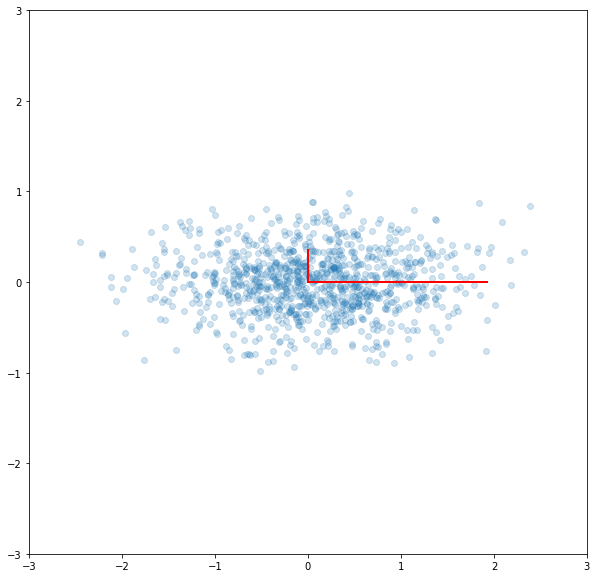

In [58]:
# construct a dataset with a skewed 2D distribution
mu = [0,0] # <== zero mean! useful for later
sigma = [[0.6,0.2],[0.2,0.2]] # asymmetric sigmas
n = 1000
X = np.random.multivariate_normal(mu, sigma, n).T
print(X)
#sigmas are not the same so "cued" distribution

plt.scatter(X[0,:], X[1,:], alpha=0.2)


###new part:
U, spectrum, Vt = np.linalg.svd(X)

l_svd = spectrum**2/(n-1)
V_svd = U

plt.figure(figsize=(10,10))

#rotates the data
Xp=np.dot(U.T,X); 
print(Xp)
plt.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
for li, vi in zip(l_svd, V_svd):
    plt.plot([0, scale_factor*li*np.dot(U,vi)[0]], [0, scale_factor*li*np.dot(U,vi)[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

In [37]:
print ("eigendecomposition:",l)
print ("SVD:",l_svd)

eigendecomposition: [0.6833 0.1136]
SVD: [0.6838 0.1136]


In [38]:
print ("eigendecomposition:",V)
print ("SVD:",V_svd)

eigendecomposition: [[ 0.9328 -0.3603]
 [ 0.3603  0.9328]]
SVD: [[-0.9329 -0.3601]
 [-0.3601  0.9329]]


### Comments
-PCA procedure leads to NLinear combination of physical quantities (ex. if bunch of momenta, pca suggests the nvariant mass (p^2) as feature) <br>
-Complex nets can grasp this! <br>
-Go through PCA before dropping anything